[View in Colaboratory](https://colab.research.google.com/github/koichi-inoue/JupyterNotebook/blob/master/DecisionTreeAnalysis.ipynb)

# 決定木

scikit-learn に同梱されたデータセット Iris を利用します。  
irisデータセットには、アヤメの品種が 150 個体分記録されています。  
アヤメのがく片や花弁の幅、長さを説明変数、  
アヤメの品種を目的変数として扱い、決定木を作成します。

## 準備
Graphviz インストール
pydotplus インストール

In [0]:
%%bash
/usr/bin/yes | apt-get install graphviz
pip install --upgrade graphviz
/usr/bin/yes | pip uninstall pyparsing
pip install -Iv https://pypi.python.org/packages/source/p/pyparsing/pyparsing-1.5.7.tar.gz
pip install --upgrade pydot

In [0]:
!pip install pydotplus

## 準備２
ライブラリ、IRISデータの読み込み

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris() # Irisデータ読み込み

In [0]:
iris.data

In [0]:
iris.target

## 訓練データとテストデータに分割
train:test=70%:30%


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],test_size=0.3, random_state=0)

## データフレーム作成＞訓練データのチェック

In [4]:
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df['species'] = y_train

print('tarin data',len(iris_df))
print('0:setosa ',len(iris_df[iris_df['species']==0]))
print('1:versicolor ', len(iris_df[iris_df['species']==1]))
print('2:virginica', len(iris_df[iris_df['species']==2]))

tarin data 105
0:setosa  34
1:versicolor  32
2:virginica 39


## 訓練データの可視化

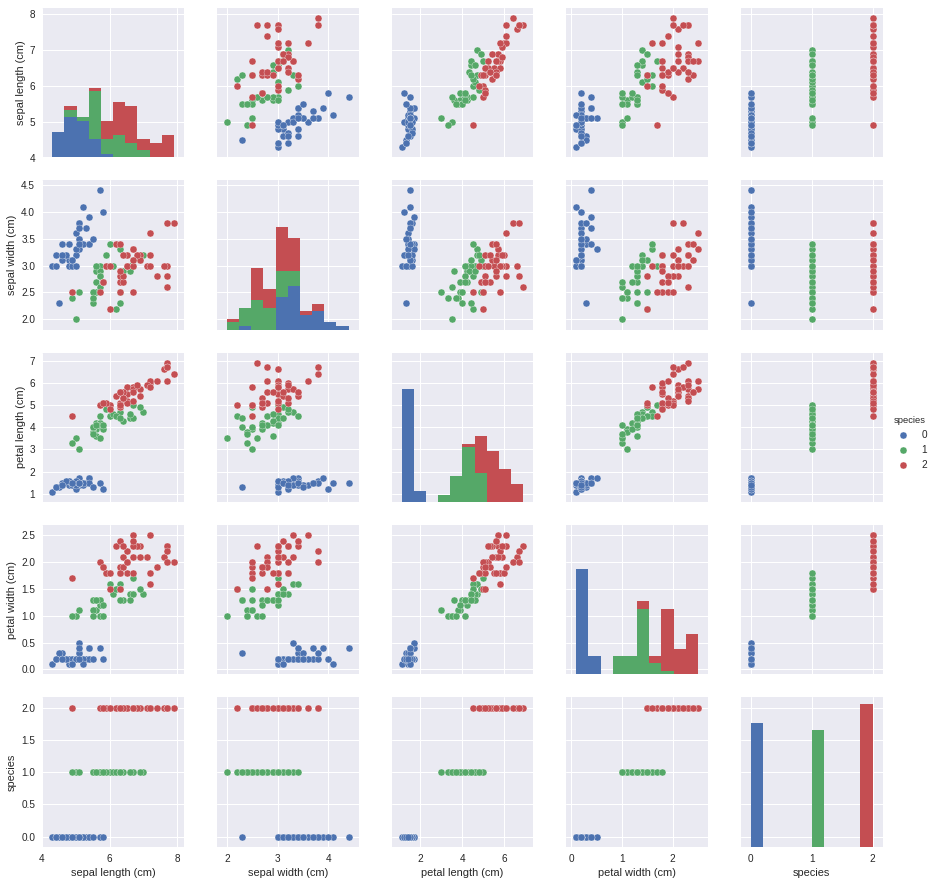

In [5]:
import seaborn as sns
sns.pairplot(iris_df, hue='species')

## 学習と学習結果の検証

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3) 
clf = clf.fit(X_train, y_train) 

In [13]:
from sklearn import metrics
predict_train = clf.predict(X_train)
ac_score = metrics.accuracy_score(y_train, predict_train)
print('score: {0:.2f}%'.format(ac_score * 100))

score: 98.10%


## 決定木モデルの可視化

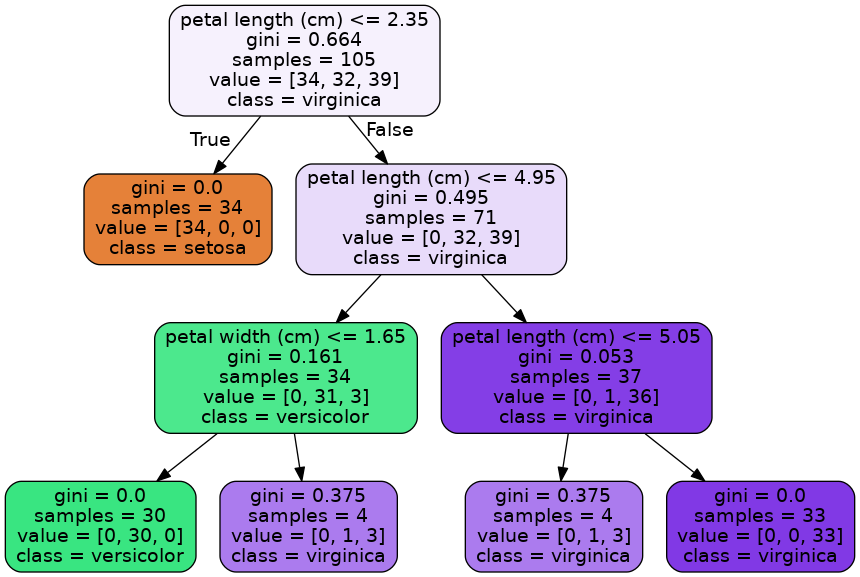

In [12]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,feature_names=iris.feature_names,class_names=iris.target_names,filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())